# Supervised Learning Algorithms
---

In [1]:
from itertools import product
import numpy as np

from sklearn.datasets import (make_classification, 
                              make_moons, 
                              make_circles)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import set_matplotlib_formats

%matplotlib inline
set_matplotlib_formats('svg')

## Make datasets

In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
random_noise_gen = np.random.RandomState(2)
X += 2 * random_noise_gen.uniform(size=X.shape)

linearly_separable = (X, y)

In [3]:
moons = make_moons(noise=0.3, 
                   random_state=0)

circles = make_circles(noise=0.2, 
                       factor=0.5, 
                       random_state=1)

In [4]:
datasets = [moons, circles, linearly_separable]
datasets_names = ['Moons', 'Circles', 'Linearly Separable']

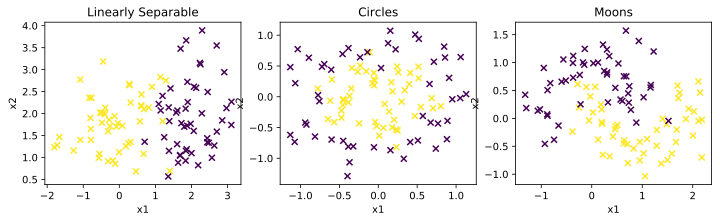

In [5]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.scatter(x = X[:,0], y = X[:,1], c=y, marker='x')
plt.title('Linearly Separable')
plt.ylabel('x2')
plt.xlabel('x1')

plt.subplot(1, 3, 2)
plt.scatter(x = circles[0][:,0], 
            y = circles[0][:,1], 
            c=circles[1], marker='x')
plt.title('Circles')
plt.ylabel('x2')
plt.xlabel('x1')

plt.subplot(1, 3, 3)
plt.scatter(x = moons[0][:,0], 
            y = moons[0][:,1], 
            c=moons[1], marker='x')
plt.title('Moons')
plt.ylabel('x2')
plt.xlabel('x1')

plt.show()

## Aux functions

In [6]:
def plot_model(X, y, trained_model, ax):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .2),
                         np.arange(y_min, y_max, .2))
    
    if hasattr(trained_model, 'decision_function'):
        # distance to the hyperplane
        Z = trained_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        # probability of belonging to the defined classes (0, 1)
        Z = trained_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
    ax.scatter(X[:, 0], X[:, 1], 
                c=y, 
                cmap=ListedColormap(['#FF0000', '#0000FF']),
                edgecolors='k')
    ax.set_title(datasets_names[i])
    ax.text(xx.max() - .3, yy.min() + .3, (f'Score: {trained_model.score(X_test, y_test):.2f}').lstrip('0'),
                size=10, horizontalalignment='right')

## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

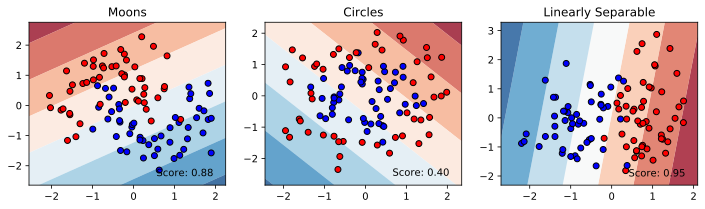

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

for i, (dataset, model) in enumerate(product(datasets, [LogisticRegression])):
    
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .2),
                         np.arange(y_min, y_max, .2))
    
    clf = model(solver='lbfgs').fit(X=X_train, y=y_train)
    
    plot_model(X, y, clf, axes[i])
    
plt.show()

## SVM

In [9]:
from sklearn.svm import SVC

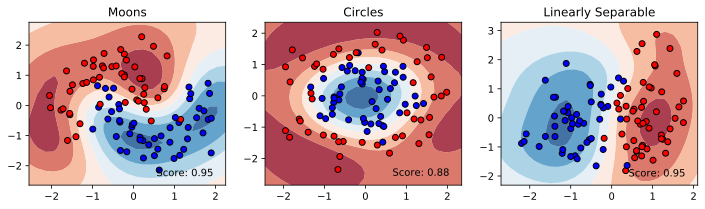

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

for i, (dataset, model) in enumerate(product(datasets, [SVC])):
    
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    
    clf = model(gamma='scale', kernel='rbf').fit(X=X_train, y=y_train)
    
    plot_model(X, y, clf, axes[i])
    
plt.show()

## k Nearest Neighbors 

In [11]:
from sklearn.neighbors import KNeighborsClassifier

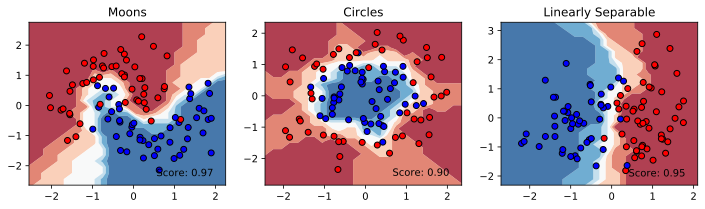

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

for i, (dataset, model) in enumerate(product(datasets, [KNeighborsClassifier])):
    
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .2),
                         np.arange(y_min, y_max, .2))
    
    clf = model(n_neighbors=5).fit(X=X_train, y=y_train)
    
    plot_model(X, y, clf, axes[i])

plt.show()